<html> <h1 style="font-style:bold; color:blue;"> Neural Computing and Deep Learning </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-2 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> MLP for Binary Classification </h2> </html>

In this lab, you will use the Ionosphere data binary (two-class) classification dataset to demonstrate an MLP for binary classification.

This dataset involves predicting whether a structure is in the atmosphere or not given radar returns.

The dataset will be downloaded automatically using Pandas, but you can learn more in the links below.

[Ionosphere Dataset (csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv)

[Ionosphere Dataset Description (csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.names)


Your task for this is lab is to develop a Keras-based Multi-Layer Perceptron model for this data set. Remember the number of output layers is equal to the number of classes.

Following we have provided some piece of code to you while you need to complete the rest of the code on your own.




<html> <h3 style="font-style:bold; color:blue;"> Here and in future practice sessions, if you see the following expression  </h3> </html>

#Your code to ......

#....

#....

<html> <h3 style="font-style:bold; color:blue;"> 
    you must write your code to solve the problem in this cell. 
    
Usually, the requirement will have a link where you can find information and examples of the solution, or you must take similar code from previous weeks' Jupyter Notebooks.  

As usual, you can compare your result with the result in the next (control) cell.
</h3> </html>


In [2]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential  # Corrected import
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler

__________________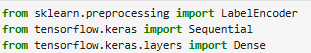

### Read the dataset from the path below. Store the data in a pandas dataframe named 'df'

Link to API - https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [3]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'

___________________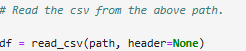

In [4]:
df=read_csv(path,header=None)

See the sample dataset. Print few rows of the dataset. Use dataframe.head() method.

Have a look at:  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html

In [5]:
# Your code to print first few rows of the dataset:
df.head()
# ...


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


Print the basic info of the dataset. Use 

dataframe.info() 

from pandas library


In [6]:
# Your code to print information about the dataframe:
df.info()
# ...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       351 non-null    int64  
 1   1       351 non-null    int64  
 2   2       351 non-null    float64
 3   3       351 non-null    float64
 4   4       351 non-null    float64
 5   5       351 non-null    float64
 6   6       351 non-null    float64
 7   7       351 non-null    float64
 8   8       351 non-null    float64
 9   9       351 non-null    float64
 10  10      351 non-null    float64
 11  11      351 non-null    float64
 12  12      351 non-null    float64
 13  13      351 non-null    float64
 14  14      351 non-null    float64
 15  15      351 non-null    float64
 16  16      351 non-null    float64
 17  17      351 non-null    float64
 18  18      351 non-null    float64
 19  19      351 non-null    float64
 20  20      351 non-null    float64
 21  21      351 non-null    float64
 22  22

Print the shape of the dataframe.Use 

dataframe.shape 

method.

In [7]:
# Your code to print the shape of the dataset:
df.shape
# ...


(351, 35)

### Separate the input and output from the dataframe. Input is all columns besides last column. Output is the last column.


______________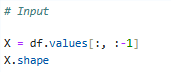

In [8]:
x=df.values[:,:-1]
x.shape

(351, 34)

In [9]:
# Your code to get y  
# Hint y = df.values[:, some parameters]
y=df.values[:,-1]
print(y)
# ...

# Your code to print 'y' shape:

# ...


['g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b'
 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b'
 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b'
 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b'
 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b'
 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g'
 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b' 'g' 'b

In [10]:
y.shape

(351,)

___________________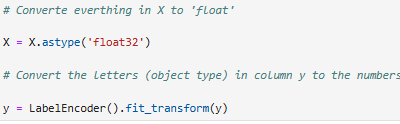

In [11]:
x=x.astype("float32")
y=LabelEncoder().fit_transform(y)
           

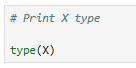

In [12]:
type(x)

numpy.ndarray

In [13]:
#LabelEncoder?
# Encode target labels with value between 0 and n_classes-1.
# This transformer should be used to encode target values, 
# *i.e.* `y`, and not the input `X`.

In [14]:
#LabelEncoder.fit_transform?

In [15]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42) # Splitting dataset into training and testing sets

print("Original Labels:", label_encoder.classes_) # Print encoded labels
print("Encoded Labels:", set(y_encoded))

Original Labels: [0 1]
Encoded Labels: {0, 1}


In [16]:
# Print the genral information of the X and y 

# Your code to print X:
print(x)
# ...

# Your code to print y:
print(y)
# ...

# your code to print shape of X. Remember X is a numpy array
print("Shape of x:", x.shape)
#...

# your code to print shape of y. Remember y is a numpy array
print("Shape of y:", y.shape)
#...


[[ 1.       0.       0.99539 ... -0.54487  0.18641 -0.453  ]
 [ 1.       0.       1.      ... -0.06288 -0.13738 -0.02447]
 [ 1.       0.       1.      ... -0.2418   0.56045 -0.38238]
 ...
 [ 1.       0.       0.94701 ...  0.00442  0.92697 -0.00577]
 [ 1.       0.       0.90608 ... -0.03757  0.87403 -0.16243]
 [ 1.       0.       0.8471  ... -0.06678  0.85764 -0.06151]]
[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1

#### Separate X and y into training and test set with a ratio of your choice. 

Use sklearn train_test_split class.

Have a look at:  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [17]:
#train_test_split?

In [18]:
# Your code to separate the data into traning and test set:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [19]:
# Print the shapes of the resulting arrays:

# Your code to print shape of X_train
# Your code to print shape of X_test
# Your code to print shape of y_train
# Your code to print shape of X_test
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

# ...


(235, 34) (116, 34) (235,) (116,)


_____________________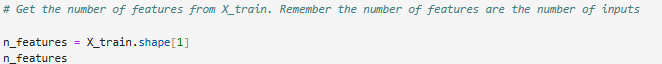

In [20]:
n_features=x_train.shape[1]
n_features

34

<html> <h2 style="font-style:bold; color:blue;"> Creating a Multi-layer Perceptron using Keras </h2> </htm
We have added first and last layers. Create the hidden layers of your choise.
You can chose any number of hidden layers and activation function of your chose
https://keras.io/api/layers/core_layers/dense/

In [22]:
from tensorflow.keras.models import Sequential

In [23]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))

# Your code to add as many layers with activation functions of your choice
# ...


model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\Dhana\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


_________________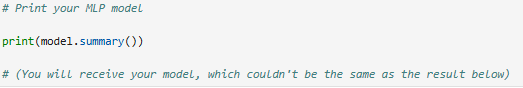

In [24]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,167 (12.37 KB)

 Trainable params: 3,167 (12.37 KB)

 Non-trainable params: 0 (0.00 B)

None


<html> <h3 style="font-style:italic; color:blue;"> MLP training </h3> </html>

In the next cell, we trained the above neural network model and tested its accuracy. 

___________________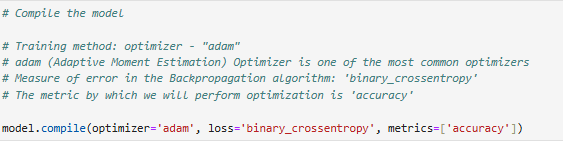

In [34]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

_____________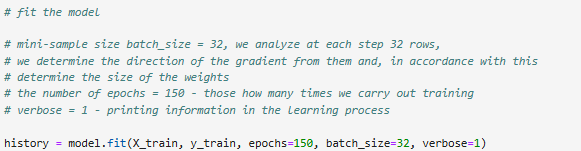

In [35]:
history=model.fit(x_train,y_train,epochs=150,batch_size=32,verbose=1)

Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7677 - loss: 0.6391
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7691 - loss: 0.6203 
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7849 - loss: 0.5915 
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7451 - loss: 0.5951
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7706 - loss: 0.5746 
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7464 - loss: 0.5816 
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7586 - loss: 0.5438
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7526 - loss: 0.5620
Epoch 9/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7714 - loss: 0.5262 
Epoch 10/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7850 - loss: 0.5023
Epoch 11/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7725 - loss: 0.4978 
Epoch 12/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7781 - los

__________________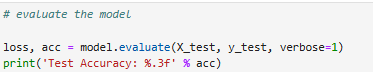

In [37]:
loss,acc=model.evaluate(x_test,y_test,verbose=1)
print("Test Accuracy:%.3f"%acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9384 - loss: 0.2229 
Test Accuracy:0.940


___________________________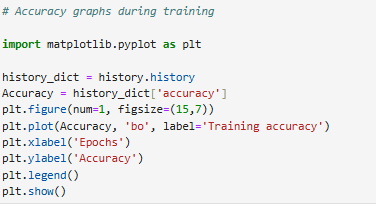

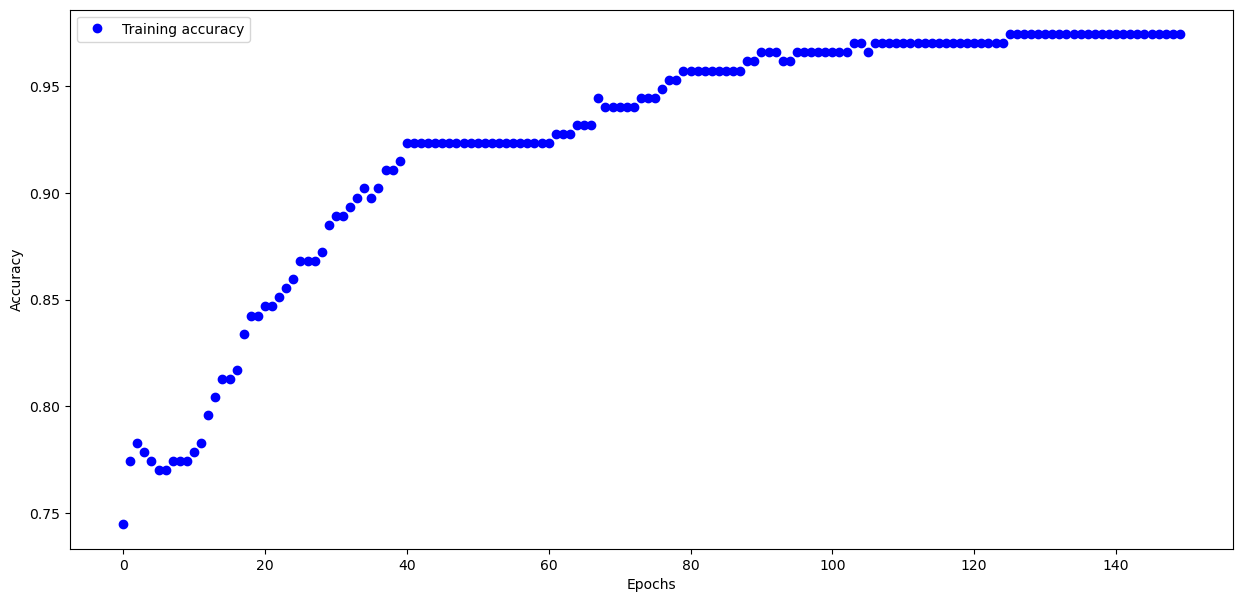

In [38]:
# Accuracy graphs during training

import matplotlib.pyplot as plt

history_dict = history.history
Accuracy = history_dict['accuracy']
plt.figure(num=1, figsize=(15,7))
plt.plot(Accuracy, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

** How much accuracy have you got? Compare the accuracy with your peers. **

** Now, change your model (add layers and cells in the cells below) and activation function to get the better accuracy as compared to your peers **

<html> <h2 style="font-style:bold; color:red;"> Lab Logbook requirements </h2> </html>

### **Important:** Document in your lab logbook the accuracy of the improved model. Do not include any code or explanations in your lab logbook. 

1. Simply record the accuracy. For example, if the obtained accuracy is 0.98, then enter "0.98" in your lab logbook.

2. Copy your MLP architectures' screenshots to Logbook.


<html> <h2 style="font-style:bold; color:blue;"> Try out the same model with Keras Functional models! </h2> </html>
(Advanced part)

Refer to [Keras](https://keras.io/) for more details and tutorials for the same.

### Define the layers & create the model object and input & output!

### https://keras.io/guides/functional_api/

#### The Keras Functional API is a way to create complex models, such as those with multiple outputs, models with shared layers, or acyclic graphs.

#### An example of a model with multiple inputs and multiple outputs:

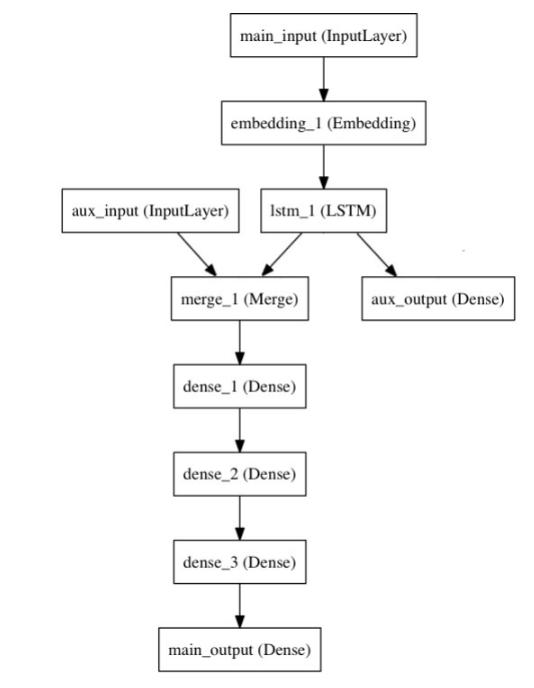

In [41]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [45]:
#  Your code of 
# Keras Functional model
# ...
# ...
# ...

In [44]:
# ✅ Keras Functional Model
input_layer = Input(shape=(X_train.shape[1],))  # Input layer
hidden1 = Dense(64, activation='relu')(input_layer)  # First hidden layer
hidden2 = Dense(32, activation='relu')(hidden1)  # Second hidden layer
output_layer = Dense(1, activation='sigmoid')(hidden2)  # Output layer (binary classification)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6601 - loss: 0.6359 - val_accuracy: 0.8451 - val_loss: 0.4924
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8338 - loss: 0.4144 - val_accuracy: 0.8873 - val_loss: 0.3874
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8932 - loss: 0.2975 - val_accuracy: 0.9155 - val_loss: 0.3201
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8865 - loss: 0.2438 - val_accuracy: 0.9014 - val_loss: 0.2919
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9306 - loss: 0.1871 - val_accuracy: 0.9014 - val_loss: 0.2850
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9356 - loss: 0.1647 - val_accuracy: 0.9155 - val_loss: 0.2513
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9759 - loss: 0.1395 - val_accuracy: 0.9014 - val_loss: 0.2539
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9716 - loss: 0.0913 - val_accuracy: 0.9155 - val_los